# Task 1.2: Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import entropy
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Loading the new dataset

In [2]:
df = pd.read_csv('../dataset/new_customer_supermarket.csv', sep='\t', index_col=0)
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta,TotSale
0,539993,2011-04-01 10:00:00,1.95,13313.0,22386,JUMBO BAG PINK POLKADOT,10,19.50
1,539993,2011-04-01 10:00:00,0.42,13313.0,21499,BLUE POLKADOT WRAP,25,10.50
2,539993,2011-04-01 10:00:00,0.42,13313.0,21498,RED RETROSPOT WRAP,25,10.50
3,539993,2011-04-01 10:00:00,2.10,13313.0,22379,RECYCLING BAG RETROSPOT,5,10.50
4,539993,2011-04-01 10:00:00,1.25,13313.0,20718,RED RETROSPOT SHOPPER BAG,10,12.50
...,...,...,...,...,...,...,...,...
363571,581587,2011-09-12 12:50:00,0.85,12680.0,22613,PACK OF SPACEBOY NAPKINS,12,10.20
363572,581587,2011-09-12 12:50:00,2.10,12680.0,22899,CHILDRENS APRON DOLLY GIRL,6,12.60
363573,581587,2011-09-12 12:50:00,4.15,12680.0,23254,CHILDRENS CUTLERY DOLLY GIRL,4,16.60
363574,581587,2011-09-12 12:50:00,4.15,12680.0,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,16.60


In [3]:
df.dtypes

BasketID        int64
BasketDate     object
Sale          float64
CustomerID    float64
ProdID         object
ProdDescr      object
Qta             int64
TotSale       float64
dtype: object

In [4]:
df = df.astype({'BasketDate': 'datetime64',
                'BasketID': 'object',
                'CustomerID': 'object'})

## Feature Extraction

The total number of items purchased by a customer during the period of observation:

In [5]:
I = df.groupby('CustomerID', as_index=False)['Qta'].sum()
I.columns = ['CustomerID', 'I']
I

,CustomerID,I
0,12347.0,2139
1,12348.0,1084
2,12349.0,630
3,12350.0,196
4,12352.0,463
...,...,...
4200,18280.0,45
4201,18281.0,54
4202,18282.0,98
4203,18283.0,1355


The number of distinct items bought by a customer in the period of observation:

In [6]:
Iu = df.groupby('CustomerID')['ProdID'].nunique().reset_index()
Iu.columns = ['CustomerID', 'Iu']
Iu

,CustomerID,Iu
0,12347.0,87
1,12348.0,9
2,12349.0,72
3,12350.0,16
4,12352.0,57
...,...,...
4200,18280.0,10
4201,18281.0,7
4202,18282.0,12
4203,18283.0,262


The maximum number of items purchased by a customer during a shopping session:

In [7]:
Imax = df.groupby(['CustomerID', 'BasketID'], as_index=False)['Qta'].sum()[['CustomerID', 'Qta']].groupby('CustomerID', as_index=False)['Qta'].max()
Imax.columns = ['CustomerID', 'Imax']
Imax

,CustomerID,Imax
0,12347.0,676
1,12348.0,600
2,12349.0,630
3,12350.0,196
4,12352.0,125
...,...,...
4200,18280.0,45
4201,18281.0,54
4202,18282.0,70
4203,18283.0,241


The Shannon entropy on the purchasing behaviour of the customer:

In [8]:
pd.DataFrame(df.groupby('CustomerID')['TotSale'].apply(lambda x : x.round().value_counts()))

TotSale
CustomerID              
12347.0    13.0       20
           17.0       17
           20.0       17
           15.0       13
           30.0       10
...                  ...
18287.0    59.0        1
           52.0        1
           45.0        1
           13.0        1
           87.0        1

[69825 rows x 1 columns]

In [9]:
E = df.groupby('CustomerID')['TotSale'].apply(lambda x : entropy(x.round().value_counts(), base=2)).reset_index()
E.columns = ['CustomerID', 'E']
E

,CustomerID,E
0,12347.0,4.239118
1,12348.0,2.550341
2,12349.0,3.903268
3,12350.0,2.500000
4,12352.0,3.158366
...,...,...
4200,18280.0,1.846439
4201,18281.0,1.842371
4202,18282.0,3.022055
4203,18283.0,2.627193


The average price spent by a customer during a shopping session:

In [10]:
Savg = df.groupby(['CustomerID', 'BasketID'], as_index=False)['TotSale'].sum()[['CustomerID', 'TotSale']].groupby('CustomerID', as_index=False)['TotSale'].mean()
Savg.columns = ['CustomerID', 'Savg']
Savg

,CustomerID,Savg
0,12347.0,599.701667
1,12348.0,261.480000
2,12349.0,1457.550000
3,12350.0,294.400000
4,12352.0,210.901667
...,...,...
4200,18280.0,180.600000
4201,18281.0,80.820000
4202,18282.0,88.300000
4203,18283.0,127.473750


In [11]:
features = I.merge(Iu, on='CustomerID').merge(Imax, on='CustomerID').merge(E, on='CustomerID').merge(Savg, on='CustomerID').set_index('CustomerID')
features

,I,Iu,Imax,E,Savg
CustomerID,,,,,
12347.0,2139,87,676,4.239118,599.701667
12348.0,1084,9,600,2.550341,261.480000
12349.0,630,72,630,3.903268,1457.550000
12350.0,196,16,196,2.500000,294.400000
12352.0,463,57,125,3.158366,210.901667
...,...,...,...,...,...
18280.0,45,10,45,1.846439,180.600000
18281.0,54,7,54,1.842371,80.820000
18282.0,98,12,70,3.022055,88.300000


### RFM Analysis

RFM (***Recency***, ***Frequency***, ***Monetary***) analysis is a *customer segmentation* technique that uses past purchase behavior to divide customers into groups.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- ***Frequency*** is the number of orders for each customer;
- ***Recency*** is the number of days between present date and date of last purchase each customer;
- ***Monetary*** is the purchase price for each customer.

In [15]:
rfm = df.groupby('CustomerID').agg({'BasketDate': lambda date: (df['BasketDate'].max() - date.max()).days,
                                    'BasketID': lambda basket: basket.nunique(),
                                    'TotSale': lambda sale: sale.sum()})
rfm.columns = ['R', 'F', 'M']
rfm

,R,F,M
CustomerID,,,
12347.0,40,6,3598.21
12348.0,76,3,784.44
12349.0,19,1,1457.55
12350.0,311,1,294.40
12352.0,73,6,1265.41
...,...,...,...
18280.0,160,1,180.60
18281.0,4,1,80.82
18282.0,216,2,176.60


In [16]:
one_time_buyers = round(sum(rfm['F'] == 1) / len(rfm) * 100, 2)
print('Percentage of customers purchase the item only once:', one_time_buyers, '%')

Percentage of customers purchase the item only once: 35.89 %


To calculate the individual RFM we will use the quartil statistical method, i.e. dividing score into four parts:

In [17]:
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles

,R,F,M
0.25,22.0,1.0,298.11
0.50,58.0,2.0,646.30
0.75,151.0,4.0,1567.20


In [18]:
# Arguments (x=value, p=recency, d=quartiles)
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

# Arguments (x=value, p=frequency, monetary, d=quartiles)
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [19]:
# create RFM segmentation table
rfm['R_quartile'] = rfm['R'].apply(RScore, args=('R', quantiles))
rfm['F_quartile'] = rfm['F'].apply(FMScore, args=('F', quantiles))
rfm['M_quartile'] = rfm['M'].apply(FMScore, args=('M', quantiles))
rfm

,R,F,M,R_quartile,F_quartile,M_quartile
CustomerID,,,,,,
12347.0,40,6,3598.21,2,1,1
12348.0,76,3,784.44,3,2,2
12349.0,19,1,1457.55,1,4,2
12350.0,311,1,294.40,4,4,4
12352.0,73,6,1265.41,3,1,2
...,...,...,...,...,...,...
18280.0,160,1,180.60,4,4,4
18281.0,4,1,80.82,1,4,4
18282.0,216,2,176.60,4,3,4


- best Recency score = 1: most recently purchase
- best Frequency score = 1: most quantity purchase
- best Monetary score = 1: spent the most

After the individual scores have been obtained, it is time to calculate the overall RFM score:

In [20]:
rfm['RFM'] = rfm.R_quartile.map(str) + rfm.F_quartile.map(str) + rfm.M_quartile.map(str)
rfm

,R,F,M,R_quartile,F_quartile,M_quartile,RFM
CustomerID,,,,,,,
12347.0,40,6,3598.21,2,1,1,211
12348.0,76,3,784.44,3,2,2,322
12349.0,19,1,1457.55,1,4,2,142
12350.0,311,1,294.40,4,4,4,444
12352.0,73,6,1265.41,3,1,2,312
...,...,...,...,...,...,...,...
18280.0,160,1,180.60,4,4,4,444
18281.0,4,1,80.82,1,4,4,144
18282.0,216,2,176.60,4,3,4,434


![rfm_segmentation](https://i.imgur.com/YmItbbm.png?)

Let's see who are our Best Customers.

In [21]:
rfm[rfm['RFM'] == '111'].sort_values('M', ascending=False)

,R,F,M,R_quartile,F_quartile,M_quartile,RFM
CustomerID,,,,,,,
14646.0,2,71,270949.86,1,1,1,111
18102.0,12,56,231822.69,1,1,1,111
17450.0,3,44,191388.79,1,1,1,111
14911.0,0,184,123161.36,1,1,1,111
14156.0,0,53,113467.06,1,1,1,111
...,...,...,...,...,...,...,...
14215.0,12,5,1611.92,1,1,1,111
16466.0,4,7,1595.96,1,1,1,111
14587.0,9,9,1577.39,1,1,1,111


How many customers do we have in each segment?

In [22]:
print('Best Customers:', len(rfm[rfm['RFM'] == '111']))
print('Loyal Customers:', len(rfm[rfm['F_quartile'] == 1]))
print('Big Spenders:', len(rfm[rfm['M_quartile'] == 1]))
print('Almost Lost:', len(rfm[rfm['RFM'] == '311']))
print('Lost Customers:', len(rfm[rfm['RFM'] == '411']))
print('Lost Cheap Customers:', len(rfm[rfm['RFM'] == '444']))

Best Customers: 440
Loyal Customers: 1012
Big Spenders: 1051
Almost Lost: 105
Lost Customers: 11
Lost Cheap Customers: 431


## Data Normalization

In [23]:
customer_profile = features.merge(rfm[['R', 'F', 'M']], on='CustomerID')
customer_profile

,I,Iu,Imax,E,Savg,R,F,M
CustomerID,,,,,,,,
12347.0,2139,87,676,4.239118,599.701667,40,6,3598.21
12348.0,1084,9,600,2.550341,261.480000,76,3,784.44
12349.0,630,72,630,3.903268,1457.550000,19,1,1457.55
12350.0,196,16,196,2.500000,294.400000,311,1,294.40
12352.0,463,57,125,3.158366,210.901667,73,6,1265.41
...,...,...,...,...,...,...,...,...
18280.0,45,10,45,1.846439,180.600000,160,1,180.60
18281.0,54,7,54,1.842371,80.820000,4,1,80.82
18282.0,98,12,70,3.022055,88.300000,216,2,176.60


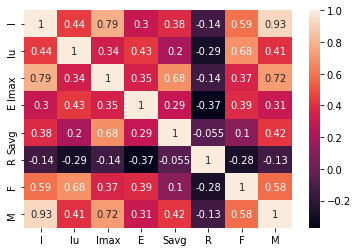

In [30]:
sns.heatmap(customer_profile.corr(), annot=True);

plt.savefig('../tex/img/preparation/features_corr.png')

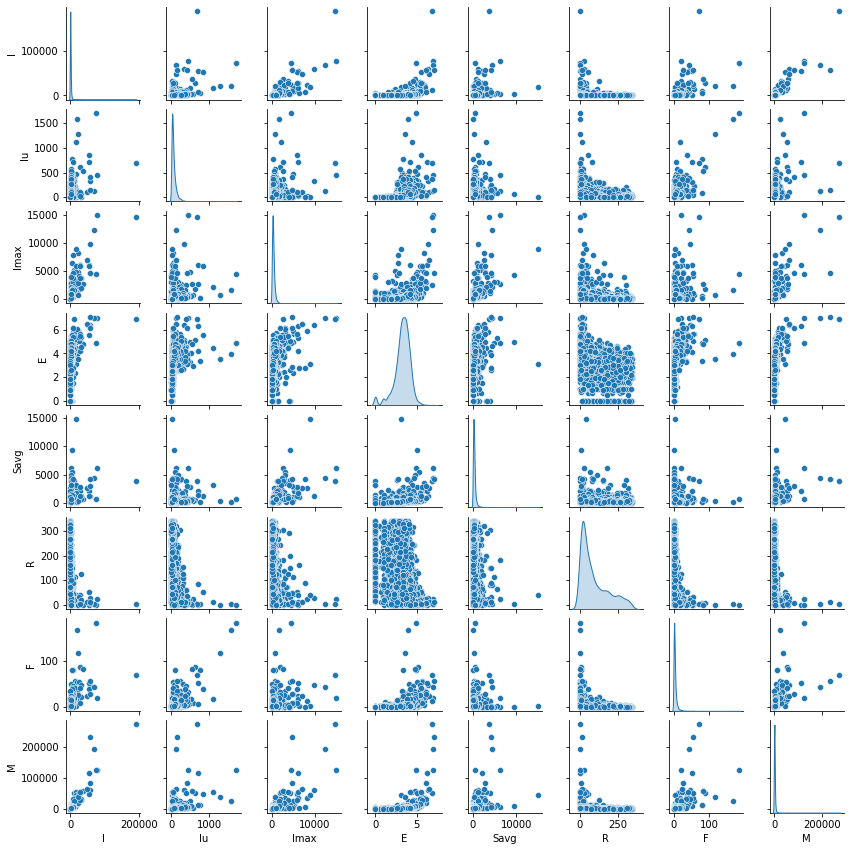

In [31]:
# produce a scatter matrix for each pair of features in the data
sns.pairplot(customer_profile, diag_kind='kde', height=1.5);

plt.savefig('../tex/img/preparation/features_pairplot.png')

We can notice that we have a skewed distribution of the variables and there exist outliers.

This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

In [32]:
log_customer_profile = pd.DataFrame({'I': np.log10(customer_profile['I']),
                                     'Iu': np.log10(customer_profile['Iu']),
                                     'Imax': np.log10(customer_profile ['Imax']),
                                     'E': customer_profile['E'],
                                     'Savg': np.log10(customer_profile['Savg']),
                                     'R': customer_profile['R'],
                                     'F': np.log10(customer_profile['F']),
                                     'M': np.log10(customer_profile['M'])})
log_customer_profile

,I,Iu,Imax,E,Savg,R,F,M
CustomerID,,,,,,,,
12347.0,3.330211,1.939519,2.829947,4.239118,2.777935,40,0.778151,3.556087
12348.0,3.035029,0.954243,2.778151,2.550341,2.417438,76,0.477121,2.894560
12349.0,2.799341,1.857332,2.799341,3.903268,3.163623,19,0.000000,3.163623
12350.0,2.292256,1.204120,2.292256,2.500000,2.468938,311,0.000000,2.468938
12352.0,2.665581,1.755875,2.096910,3.158366,2.324080,73,0.778151,3.102231
...,...,...,...,...,...,...,...,...
18280.0,1.653213,1.000000,1.653213,1.846439,2.256718,160,0.000000,2.256718
18281.0,1.732394,0.845098,1.732394,1.842371,1.907519,4,0.000000,1.907519
18282.0,1.991226,1.079181,1.845098,3.022055,1.945961,216,0.301030,2.246991


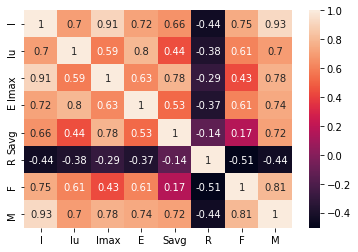

In [33]:
sns.heatmap(log_customer_profile.corr(), annot=True);

plt.savefig('../tex/img/preparation/features_corr_logs.png')

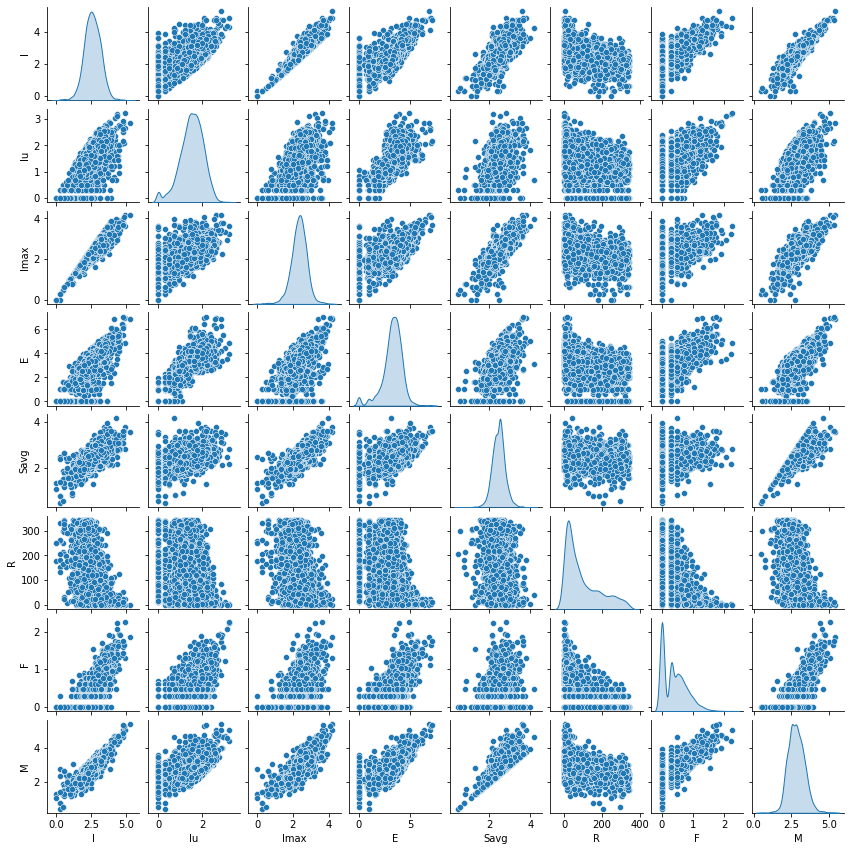

In [34]:
# produce a scatter matrix for each pair of features in the data
sns.pairplot(log_customer_profile, palette='Dark2', diag_kind='kde', height=1.5);

plt.savefig('../tex/img/preparation/features_pairplot_logs.png')

## Saving the Customer Profile model

In [29]:
log_customer_profile.to_csv('../dataset/customer_profile_model.csv', sep='\t')